In [4]:
import requests
import time
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def get_top_movies(year):
    # returns the top 400 movies from website by year as a dataframe
    frames = []
    offsets = [1 , 101, 201, 301]
    for offset in offsets:
        try:
            url = 'https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/released-in-{}/{}'.format(year, offset)
            html_page = requests.get(url)
            frames.append(pd.read_html(html_page.text, index_col=0)[1])
        except IndexError:
            break
        
    return pd.concat(frames)

In [6]:
#testing above function
df = get_top_movies(2020)

# good checkpoint to add lines to see what all df is.... will erase this full block when neating up code
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 1 to 218
Data columns (total 5 columns):
Movie                       218 non-null object
Distributor                 217 non-null object
DomesticBoxOffice           218 non-null object
OpeningWeekendBox Office    204 non-null object
MaxTheaterCount             218 non-null int64
dtypes: int64(1), object(4)
memory usage: 10.2+ KB


,Movie,Distributor,DomesticBoxOffice,OpeningWeekendBox Office,MaxTheaterCount
Rank,,,,,
1,Bad Boys For Life,Sony Pict…,"$204,417,855","$62,504,105",3775
2,Sonic The Hedgehog,Paramount…,"$146,066,470","$58,018,348",4198
3,Birds of Prey (And the Fantabulous Emancipation…,Warner Bros.,"$84,158,461","$33,010,017",4236
4,Dolittle,Universal,"$77,047,065","$21,844,045",4155
5,The Invisible Man,Universal,"$64,914,050","$28,205,665",3636
...,...,...,...,...,...
214,Une sirÃ¨ne Ã Paris,Sony Pict…,"$1,202","$1,202",10
215,Fear PHarm,Indican P…,"$1,157",$485,1
216,Hai Tang Hong,M Star In…,"$1,107",$310,30


In [7]:
def no_char(col):
    # enter dataframe column to return string of the column back w/o '$' and ','.
    df1 = col
    df1
    df1 = df1.str.replace('$', '')
    df1 = df1.str.replace(',', '')
    return df1

In [8]:
#testing function above, ridding the special chars
df['OpeningWeekendBox Office'] = no_char(df['OpeningWeekendBox Office'])
df['DomesticBoxOffice'] = no_char(df['DomesticBoxOffice'])

df

,Movie,Distributor,DomesticBoxOffice,OpeningWeekendBox Office,MaxTheaterCount
Rank,,,,,
1,Bad Boys For Life,Sony Pict…,204417855,62504105,3775
2,Sonic The Hedgehog,Paramount…,146066470,58018348,4198
3,Birds of Prey (And the Fantabulous Emancipation…,Warner Bros.,84158461,33010017,4236
4,Dolittle,Universal,77047065,21844045,4155
5,The Invisible Man,Universal,64914050,28205665,3636
...,...,...,...,...,...
214,Une sirÃ¨ne Ã Paris,Sony Pict…,1202,1202,10
215,Fear PHarm,Indican P…,1157,485,1
216,Hai Tang Hong,M Star In…,1107,310,30


In [9]:
#"probably will erase one of these functions..... executive decisions on which is better for plugging into NaN values"
def get_col_mean(col):
    #"drops na to find avg. col is clean pandas str format"
    df1 = col
    df1 = df1.dropna()
    df1 = df1.astype(int)
    
    return str(int(df1.mean()))

def get_col_median(col):
    #"drops na to find avg. col is clean pandas str format"
    df1 = col
    df1 = df1.dropna()
    df1 = df1.astype(int)
    
    return str(int(df1.median()))

In [10]:
#still diciding which value to plug into nans with... will erase half this block

# replaceing nan values with mean in string format
#df['OpeningWeekendBox Office'] = df['OpeningWeekendBox Office'].fillna(get_col_mean(df['OpeningWeekendBox Office']))

# replaceing nan values with median in string format and then changing the column to int
df['OpeningWeekendBox Office'] = df['OpeningWeekendBox Office'].fillna(get_col_median(df['OpeningWeekendBox Office']))
df['OpeningWeekendBox Office'] = df['OpeningWeekendBox Office'].astype(int)

# replaceing nan values with median in string format and then changing the column to int
df['DomesticBoxOffice'] = df['DomesticBoxOffice'].fillna(get_col_median(df['DomesticBoxOffice']))
df['DomesticBoxOffice'] = df['DomesticBoxOffice'].astype(int)

mean      2.095638e+06
median    2.428000e+04
std       7.581119e+06
Name: OpeningWeekendBox Office, dtype: float64
mean      5.313465e+06
median    9.872950e+04
std       2.046526e+07
Name: DomesticBoxOffice, dtype: float64


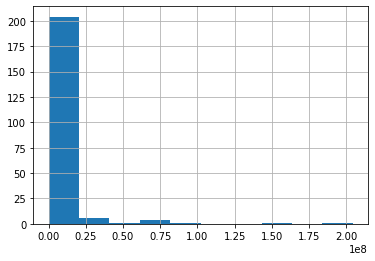

In [11]:
#test two, replacing nan with median
#just playing with data, nothing here meaningful at the moment. (trash code)
print(df['OpeningWeekendBox Office'].apply(['mean', 'median', 'std']))
#df['OpeningWeekendBox Office'].hist()

print(df['DomesticBoxOffice'].apply(['mean', 'median', 'std']))
df['DomesticBoxOffice'].hist()

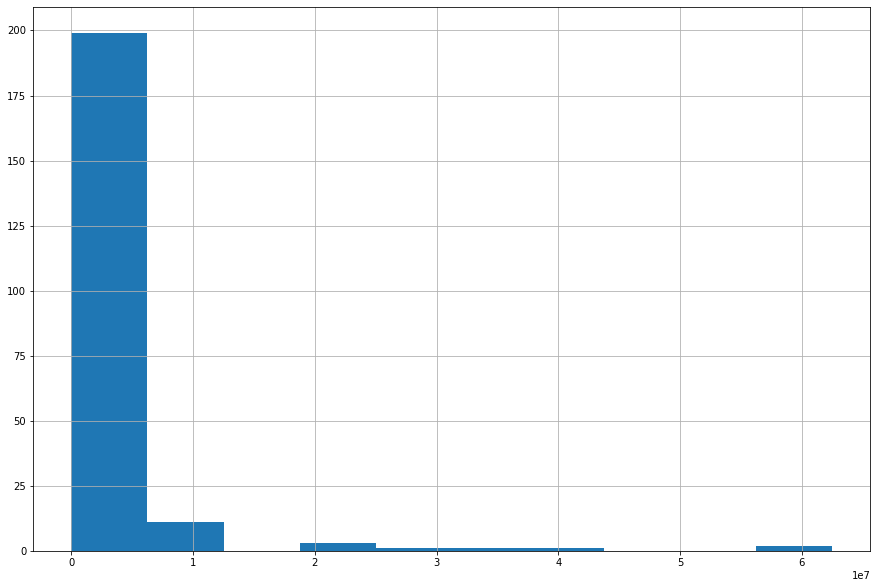

In [12]:
# once again, just playing with code.... just trash currently

# ylim and xlim literally just zooms in on overall chart//// need to break this down /// changing x values should do it

fig = plt.figure(figsize = (15,10))
ax = fig.gca()
df['OpeningWeekendBox Office'].hist(ax = ax)


In [13]:
def get_keys(path):
    #get .json file from local machine
    with open(path) as f:
        return json.load(f)

In [14]:
# need to change to a remote file location. 
keys = get_keys("/Users/Deric/Documents/Flatiron/phase_One/.secret/omdb_api.json")
api_key = keys['api_key']

In [15]:
def get_movie_info(title, year, api_key):
    #plug in title, year, apikey to return the full api of the selected movie.
    #each api request requires the url and the params (at least the title or the movie id)
    api_url = "http://www.omdbapi.com/?apikey={}".format(api_key)
    params = {
            't' : title,
            'type': 'movie',
            'y' : year
            }
    response = requests.get(api_url, params = params).json()
    return response

def get_movie_search(title, year, api_key):
    api_url = "http://www.omdbapi.com/?apikey={}".format(api_key)
    params = {
            's' : title,
            'type': 'movie',
            'y' : year,
            'plot' : 'full'
            }
    response = requests.get(api_url, params = params).json()
    return response
    

In [16]:
#this cell is just testing my function above.
title = 'Birds of Prey'
year = 2020

get_movie_search(title, year, api_key)


{'Search': [{'Title': 'Harley Quinn: Birds of Prey',
   'Year': '2020',
   'imdbID': 'tt7713068',
   'Type': 'movie',
   'Poster': 'https://m.media-amazon.com/images/M/MV5BMzQ3NTQxMjItODBjYi00YzUzLWE1NzQtZTBlY2Y2NjZlNzkyXkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_SX300.jpg'},
  {'Title': 'Harley Quinn: Birds of Prey - Triumph Featurette',
   'Year': '2020',
   'imdbID': 'tt11865264',
   'Type': 'movie',
   'Poster': 'https://m.media-amazon.com/images/M/MV5BZjkwODU1NGMtM2IxNy00OTljLThiZGMtMGJmN2JjMGY4MTZlXkEyXkFqcGdeQXVyNDIzMTQwODY@._V1_SX300.jpg'}],
 'totalResults': '2',
 'Response': 'True'}

In [17]:
z = get_movie_search(title, year, api_key)
z['Search'][0]["Title"]

'Harley Quinn: Birds of Prey'

In [18]:
a = get_movie_info('Harley Quinn: Birds of Prey', year, api_key)
a['Released']

'07 Feb 2020'

In [19]:
get_movie_info('Harley Quinn: Birds of Prey', year, api_key)

{'Title': 'Harley Quinn: Birds of Prey',
 'Year': '2020',
 'Rated': 'R',
 'Released': '07 Feb 2020',
 'Runtime': '109 min',
 'Genre': 'Action, Adventure, Crime',
 'Director': 'Cathy Yan',
 'Writer': 'Christina Hodson, Paul Dini (Harley Quinn created by), Bruce Timm (Harley Quinn created by)',
 'Actors': 'Margot Robbie, Rosie Perez, Mary Elizabeth Winstead, Jurnee Smollett',
 'Plot': 'After splitting with the Joker, Harley Quinn joins superheroes Black Canary, Huntress and Renee Montoya to save a young girl from an evil crime lord.',
 'Language': 'English, Chinese',
 'Country': 'USA',
 'Awards': '2 wins & 3 nominations.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMzQ3NTQxMjItODBjYi00YzUzLWE1NzQtZTBlY2Y2NjZlNzkyXkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '6.1/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '78%'},
  {'Source': 'Metacritic', 'Value': '60/100'}],
 'Metascore': '60',
 'imdbRating': '6.1',
 'imdbVotes': '1

In [20]:
#this cell is just testing my function above.
title = 'Bad Boys For Life'
year = 2020

a = get_movie_info(title, year, api_key)
get_movie_info(title, year, api_key)

{'Title': 'Bad Boys for Life',
 'Year': '2020',
 'Rated': 'R',
 'Released': '17 Jan 2020',
 'Runtime': '124 min',
 'Genre': 'Action, Comedy, Crime, Thriller',
 'Director': 'Adil El Arbi, Bilall Fallah',
 'Writer': 'Peter Craig (story by), Joe Carnahan (story by), Chris Bremner (screenplay by), Peter Craig (screenplay by), Joe Carnahan (screenplay by), George Gallo (based on characters created by)',
 'Actors': 'Will Smith, Martin Lawrence, Vanessa Hudgens, Alexander Ludwig',
 'Plot': 'Miami detectives Mike Lowrey and Marcus Burnett must face off against a mother-and-son pair of drug lords who wreak vengeful havoc on their city.',
 'Language': 'English, Spanish',
 'Country': 'USA, Mexico',
 'Awards': '1 nomination.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMWU0MGYwZWQtMzcwYS00NWVhLTlkZTAtYWVjOTYwZTBhZTBiXkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '6.6/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '77%'},
  {'Source

In [21]:
a['Genre'].split(',')

['Action', ' Comedy', ' Crime', ' Thriller']

=======================================================

2)connecting df to api to add the next couple cols(release month, genre)


I already cleaned up most of my code.... so please feel free to interject print statements all over to verify and fully understand each bit of code.



In [22]:
df.head(10)

,Movie,Distributor,DomesticBoxOffice,OpeningWeekendBox Office,MaxTheaterCount
Rank,,,,,
1,Bad Boys For Life,Sony Pict…,204417855,62504105,3775
2,Sonic The Hedgehog,Paramount…,146066470,58018348,4198
3,Birds of Prey (And the Fantabulous Emancipation…,Warner Bros.,84158461,33010017,4236
4,Dolittle,Universal,77047065,21844045,4155
5,The Invisible Man,Universal,64914050,28205665,3636
6,The Call of the Wild,20th Cent…,62342368,24791624,3914
7,Onward,Walt Disney,61555145,39119861,4310
8,Tenet,Warner Bros.,50600000,20200000,2930
9,The Gentlemen,STX Enter…,36471796,10651884,2675


In [23]:
def get_release_data_list(df1, year, api_key):
    release_month = []
    genre_list = []
    for i in range(1, 6):
    # loop to find the first 20 releash dates
        title = df1['Movie'][i]
        
        
        try:
            a = get_movie_info(title, 2020, api_key)
            
            month = a['Released']
            genre = a['Genre'].split(',')
            
            release_month.append(month)
            genre_list.append(genre)
        except KeyError:
            
            try:
                title_word_list = title.split()
                title = " "
                title = title.join(title_word_list[:2])

                search = get_movie_search(title, year, api_key)
                real_title = search['Search'][0]['Title']

                a = get_movie_info(real_title, 2020, api_key)
                
                month = a['Released']
                genre = a['Genre'].split(',')
                
                release_month.append(month)
                genre_list.append(genre)
                
            except KeyError:
                release_month.append(np.nan)
    
        time.sleep(.5)
        
    release_and_genre_list = [release_month, genre_list]
        
    return release_and_genre_list

In [25]:
get_release_data_list(df,2020, api_key)
a = get_release_data_list(df,2020, api_key)
a[0]

['17 Jan 2020', '14 Feb 2020', '07 Feb 2020', '17 Jan 2020', '28 Feb 2020']

In [28]:
for i in range(len(a[0])):
    df.loc[i+1, 'release date'] = a[0][i]

df

,Movie,Distributor,DomesticBoxOffice,OpeningWeekendBox Office,MaxTheaterCount,releash date,release date
Rank,,,,,,,
1,Bad Boys For Life,Sony Pict…,204417855.0,62504105.0,3775.0,17 Jan 2020,17 Jan 2020
2,Sonic The Hedgehog,Paramount…,146066470.0,58018348.0,4198.0,14 Feb 2020,14 Feb 2020
3,Birds of Prey (And the Fantabulous Emancipation…,Warner Bros.,84158461.0,33010017.0,4236.0,07 Feb 2020,07 Feb 2020
4,Dolittle,Universal,77047065.0,21844045.0,4155.0,17 Jan 2020,17 Jan 2020
5,The Invisible Man,Universal,64914050.0,28205665.0,3636.0,28 Feb 2020,28 Feb 2020
...,...,...,...,...,...,...,...
215,Fear PHarm,Indican P…,1157.0,485.0,1.0,NaN,NaN
216,Hai Tang Hong,M Star In…,1107.0,310.0,30.0,NaN,NaN
217,The Shade Shepherd,Indican P…,544.0,544.0,1.0,NaN,NaN
